In [1]:
import pandas as pd
import scipy
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('sell_result/sell_table_2.csv')

In [3]:
df = df.iloc[:, 1:]

In [4]:
df = df[df.index != 746]

In [5]:
df = df[df['Price_duplicate'] > 100000].copy()

In [6]:
for c in df.columns:
    print(c, len(df[c][df[c].isnull()]))

Lat 0
Lon 0
District 0
Small_district 3797
Rooms 0
Price 40
Price_duplicate 0
Totsp 0
Livesp 4294
Kitsp 852
Dist 0
Stname 1223
Metrdist 1223
Walk 1223
Brick 3797
Tel 0
Bal 0
Floor 2
Nfloors 104
New 0
Link 0


In [22]:
from sklearn import cross_validation

In [54]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [207]:
def accuracy_report(y_true, y_pred, make_plot=True):
    print('MSE: {:.3f}'.format(mse(y_true, y_pred)))
    print('RMSE: {:.3f}'.format(np.sqrt(mse(y_true, y_pred))))
    print('MAE: {:.3f}'.format(mae(y_true, y_pred)))
    if make_plot:
        plt.figure(figsize=(8,6))
        plt.scatter(y_true, y_pred)
        plt.xlabel('Reality')
        plt.ylabel('Prediction')
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')

# Linear Model (OLS)

There are a lot of NaNs in variable Brick - so we will drop it

Then we will try linear model on all data just without NaNs and the we will try to add variable or fill the NaNs

In the header we will write all Varibles we use and if we fill the NaNs

In [37]:
from sklearn.linear_model import LinearRegression

### 1.1

##### Lat, Lon, Rooms, Totsp, Livesp, Kitsp, Dist, Metrdist, Walk, Brick, Tel, Bal, Floor, Nfloors, New

In [208]:
data = df[['Lat', 'Lon', 'Rooms', 'Totsp', 'Livesp', 'Kitsp', 'Dist', 'Metrdist', 'Walk', 'Brick', 'Tel',\
           'Bal', 'Floor', 'Nfloors', 'New', 'Price_duplicate']].dropna()

In [209]:
len(data)

2167

In [210]:
train_data, test_data, train_labels, test_labels = \
cross_validation.train_test_split(data.iloc[:, :-1],
                                  data.iloc[:, -1],
                                  test_size = 0.1,
                                  random_state=0)

In [211]:
model = LinearRegression()
model.fit(X=train_data, y=train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

MSE: 60948466082364.906
RMSE: 7806949.858
MAE: 4390151.444


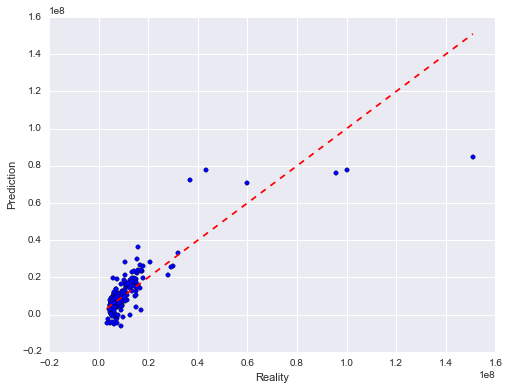

In [212]:
accuracy_report(test_labels, model.predict(test_data))

### 1.2

#### Lat, Lon, Rooms, Totsp, Livesp, Kitsp, Dist, Metrdist, Walk, Brick, Tel, Bal, Floor, Nfloors, New

#### Fill NaN's with 0

In [213]:
data = df[['Lat', 'Lon', 'Rooms', 'Totsp', 'Livesp', 'Kitsp', 'Dist', 'Metrdist', 'Walk', 'Brick', 'Tel',\
           'Bal', 'Floor', 'Nfloors', 'New', 'Price_duplicate']].fillna(0)

train_data, test_data, train_labels, test_labels = \
cross_validation.train_test_split(data.iloc[:, :-1],
                                  data.iloc[:, -1],
                                  test_size = 0.1,
                                  random_state=0)

In [214]:
len(data)

8976

In [215]:
model = LinearRegression()
model.fit(X=train_data, y=train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

MSE: 115096656844937.141
RMSE: 10728310.997
MAE: 4762746.966


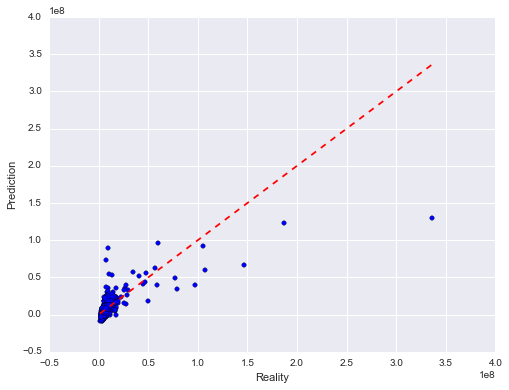

In [216]:
accuracy_report(test_labels, model.predict(test_data))

### 1.3

#### Lat, Lon, Rooms, Totsp, Kitsp, Dist, Metrdist, Walk, Tel, Bal, Floor, New
#### Drop these variables: Livesp (too much NaNs), Brick (too much NaNs), Nfloors (May be it's not important plus highly correlated with floors)

In [217]:
data = df[['Lat', 'Lon', 'Rooms', 'Totsp', 'Kitsp', 'Dist', 'Metrdist', 'Walk', 'Tel',\
           'Bal', 'Floor', 'New', 'Price_duplicate']].dropna()

train_data, test_data, train_labels, test_labels = \
cross_validation.train_test_split(data.iloc[:, :-1],
                                  data.iloc[:, -1],
                                  test_size = 0.1,
                                  random_state=0)

In [218]:
len(data)

7101

In [219]:
model = LinearRegression()
model.fit(X=train_data, y=train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

MSE: 41369946842951.562
RMSE: 6431947.360
MAE: 3435153.091


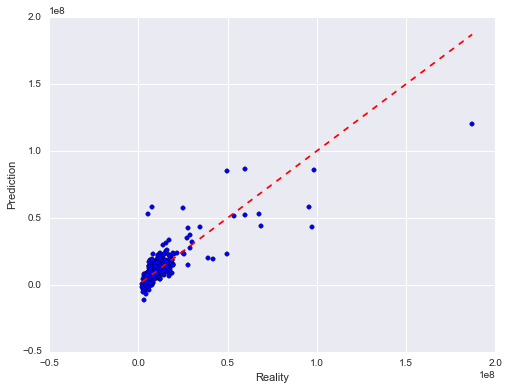

In [220]:
accuracy_report(test_labels, model.predict(test_data))

### 1.4

#### Lat, Lon, Rooms, Totsp, Kitsp, Dist, Metrdist, Walk, Tel, Bal, Floor, New
#### Drop these variables: Livesp (too much NaNs), Brick (too much NaNs), Nfloors (May be it's not important plus highly correlated with floors)
#### Fill NaNs with 0

In [221]:
data = df[['Lat', 'Lon', 'Rooms', 'Totsp', 'Kitsp', 'Dist', 'Metrdist', 'Walk', 'Tel',\
           'Bal', 'Floor', 'New', 'Price_duplicate']].fillna(0)

train_data, test_data, train_labels, test_labels = \
cross_validation.train_test_split(data.iloc[:, :-1],
                                  data.iloc[:, -1],
                                  test_size = 0.1,
                                  random_state=0)

In [222]:
len(data)

8976

In [223]:
model = LinearRegression()
model.fit(X=train_data, y=train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

MSE: 119562692785335.375
RMSE: 10934472.680
MAE: 4946369.837


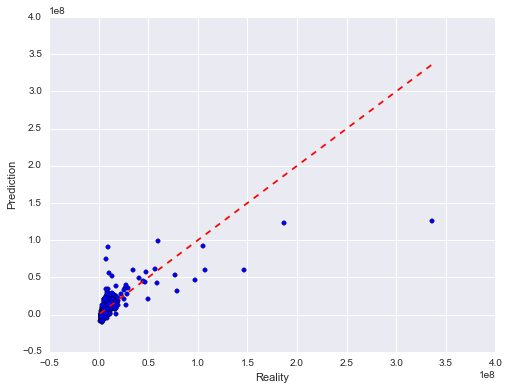

In [224]:
accuracy_report(test_labels, model.predict(test_data))

### 1.5

#### Try to fill Livesp based on Totsp and Kitsp

In [225]:
kitsp_dropna_index = df['Kitsp'].dropna().index

In [226]:
livesp_dropna_index = df.loc[kitsp_na_index, ['Totsp', 'Livesp', 'Kitsp']].dropna().index

In [227]:
livesp_na_index = []
for i in kitsp_dropna_index:
    if i not in livesp_dropna_index:
        livesp_na_index.append(i)

In [228]:
train_data, test_data, train_labels, test_labels = \
cross_validation.train_test_split(df.loc[livesp_dropna_index, ['Totsp', 'Kitsp']],
                                  df.loc[livesp_dropna_index, 'Livesp'],
                                  test_size = 0.1,
                                  random_state=0)

In [229]:
model_fill_lvsp = LinearRegression()
model_fill_lvsp.fit(X=train_data, y=train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

MSE: 9.911
RMSE: 3.148
MAE: 2.153


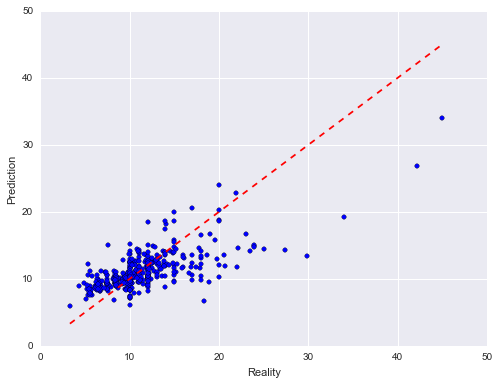

In [230]:
accuracy_report(test_labels, model_fill_lvsp.predict(test_data))

In [231]:
model_fill_lvsp = LinearRegression()
model_fill_lvsp.fit(X=df.loc[livesp_dropna_index, ['Totsp', 'Kitsp']], y=df.loc[livesp_dropna_index, 'Livesp'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [232]:
pred_lvsp = model_fill_lvsp.predict(df.loc[livesp_na_index, ['Totsp', 'Kitsp']])

##### Fill NaNs of Livesp in new DF.

In [233]:
df_fill_lvsp = df.copy()

In [234]:
df_fill_lvsp.loc[livesp_na_index, 'Livesp'] = pred_lvsp

##### Try linear regression with filled Livespace

###### Lat, Lon, Rooms, Totsp, Kitsp, Dist, Metrdist, Walk, Tel, Bal, Floor, New
###### Livesp (filled using ols)

In [235]:
data = df_fill_lvsp[['Lat', 'Lon', 'Rooms', 'Totsp', 'Livesp', 'Kitsp', 'Dist', 'Metrdist', 'Walk', 'Tel',\
           'Bal', 'Floor', 'New', 'Price_duplicate']].dropna()

train_data, test_data, train_labels, test_labels = \
cross_validation.train_test_split(data.iloc[:, :-1],
                                  data.iloc[:, -1],
                                  test_size = 0.1,
                                  random_state=0)

In [236]:
len(data)

7101

In [237]:
model = LinearRegression()
model.fit(X=train_data, y=train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

MSE: 43872751658106.609
RMSE: 6623650.931
MAE: 3495594.676


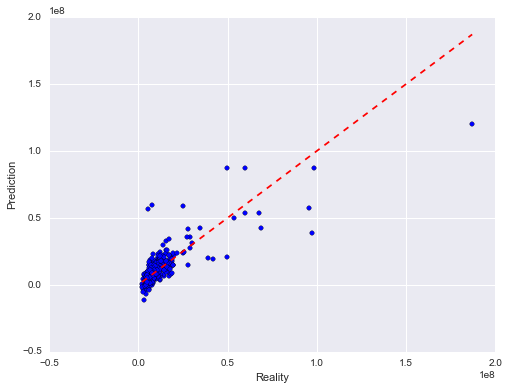

In [238]:
accuracy_report(test_labels, model.predict(test_data))

# Ridge regression

In [239]:
from sklearn.linear_model import Ridge

Now we will do only 1,3 and 5 models with corresponding NaNs processing

### 2.1

#### Lat, Lon, Rooms, Totsp, Livesp, Kitsp, Dist, Metrdist, Walk, Brick, Tel, Bal, Floor, Nfloors, New

In [240]:
data = df[['Lat', 'Lon', 'Rooms', 'Totsp', 'Livesp', 'Kitsp', 'Dist', 'Metrdist', 'Walk', 'Brick', 'Tel',\
           'Bal', 'Floor', 'Nfloors', 'New', 'Price_duplicate']].dropna()

train_data, test_data, train_labels, test_labels = \
cross_validation.train_test_split(data.iloc[:, :-1],
                                  data.iloc[:, -1],
                                  test_size = 0.1,
                                  random_state=0)

In [241]:
len(data)

2167

In [242]:
model = Ridge(alpha=100)
model.fit(X=train_data, y=train_labels)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

MSE: 56547833261953.438
RMSE: 7519829.337
MAE: 4268952.654


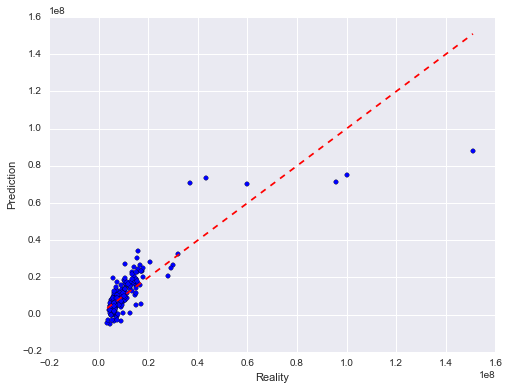

In [243]:
accuracy_report(test_labels, model.predict(test_data))

### 2.3

#### Lat, Lon, Rooms, Totsp, Kitsp, Dist, Metrdist, Walk, Tel, Bal, Floor, New
#### Drop these variables: Livesp (too much NaNs), Brick (too much NaNs), Nfloors (May be it's not important plus highly correlated with floors)

In [244]:
data = df[['Lat', 'Lon', 'Rooms', 'Totsp', 'Kitsp', 'Dist', 'Metrdist', 'Walk', 'Tel',\
           'Bal', 'Floor', 'New', 'Price_duplicate']].dropna()

train_data, test_data, train_labels, test_labels = \
cross_validation.train_test_split(data.iloc[:, :-1],
                                  data.iloc[:, -1],
                                  test_size = 0.1,
                                  random_state=0)

In [245]:
len(data)

7101

In [246]:
model = Ridge(alpha=100)
model.fit(X=train_data, y=train_labels)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

MSE: 41414884214443.859
RMSE: 6435439.706
MAE: 3420698.977


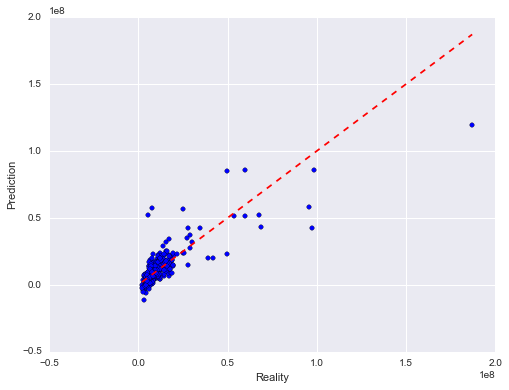

In [247]:
accuracy_report(test_labels, model.predict(test_data))

### 2.5

##### Lat, Lon, Rooms, Totsp, Kitsp, Dist, Metrdist, Walk, Tel, Bal, Floor, New
##### Livesp (filled using ols)

In [248]:
data = df_fill_lvsp[['Lat', 'Lon', 'Rooms', 'Totsp', 'Livesp', 'Kitsp', 'Dist', 'Metrdist', 'Walk', 'Tel',\
           'Bal', 'Floor', 'New', 'Price_duplicate']].dropna()

train_data, test_data, train_labels, test_labels = \
cross_validation.train_test_split(data.iloc[:, :-1],
                                  data.iloc[:, -1],
                                  test_size = 0.1,
                                  random_state=0)

In [249]:
len(data)

7101

MSE: 43771055016797.391
RMSE: 6615969.696
MAE: 3476043.100


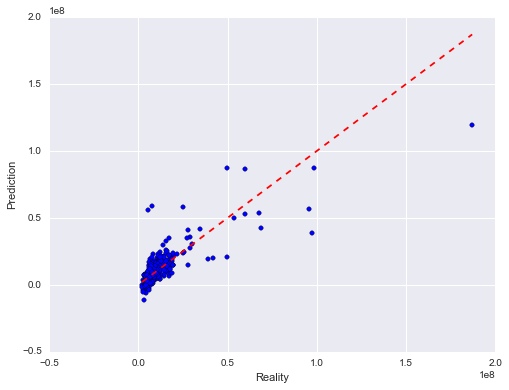

In [250]:
model = Ridge(alpha=100)
model.fit(X=train_data, y=train_labels)
accuracy_report(test_labels, model.predict(test_data))

# Lasso regression

Here we will use only 3 and 5

In [251]:
from sklearn.linear_model import Lasso

### 3.3

##### Lat, Lon, Rooms, Totsp, Kitsp, Dist, Metrdist, Walk, Tel, Bal, Floor, New
##### Drop these variables: Livesp (too much NaNs), Brick (too much NaNs), Nfloors (May be it's not important plus highly correlated with floors)

In [252]:
data = df[['Lat', 'Lon', 'Rooms', 'Totsp', 'Kitsp', 'Dist', 'Metrdist', 'Walk', 'Tel',\
           'Bal', 'Floor', 'New', 'Price_duplicate']].dropna()

train_data, test_data, train_labels, test_labels = \
cross_validation.train_test_split(data.iloc[:, :-1],
                                  data.iloc[:, -1],
                                  test_size = 0.1,
                                  random_state=0)

MSE: 41462962302305.578
RMSE: 6439174.039
MAE: 3417211.207


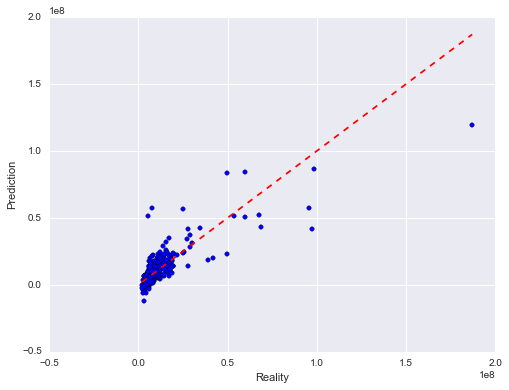

In [253]:
model = Lasso(alpha=120000)
model.fit(X=train_data, y=train_labels)
accuracy_report(test_labels, model.predict(test_data))

### 3.5

##### Lat, Lon, Rooms, Totsp, Kitsp, Dist, Metrdist, Walk, Tel, Bal, Floor, New
##### Livesp (filled using ols)

In [254]:
data = df_fill_lvsp[['Lat', 'Lon', 'Rooms', 'Totsp', 'Livesp', 'Kitsp', 'Dist', 'Metrdist', 'Walk', 'Tel',\
           'Bal', 'Floor', 'New', 'Price_duplicate']].dropna()

train_data, test_data, train_labels, test_labels = \
cross_validation.train_test_split(data.iloc[:, :-1],
                                  data.iloc[:, -1],
                                  test_size = 0.1,
                                  random_state=0)

MSE: 43436176369706.914
RMSE: 6590612.746
MAE: 3464566.546


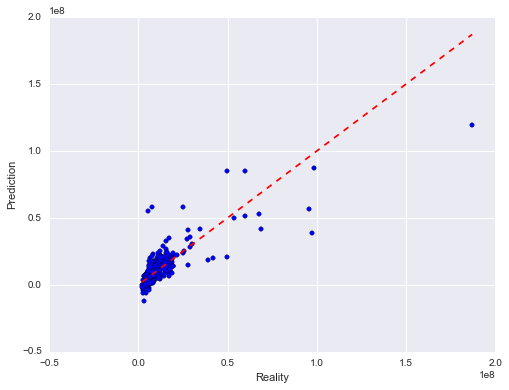

In [255]:
model = Lasso(alpha=130000)
model.fit(X=train_data, y=train_labels)
accuracy_report(test_labels, model.predict(test_data))

# Random Forest Regression

Here we will use 3 and 5 too (but we will fill NaNs in Livwsp using RFReg too).

In [256]:
from sklearn.ensemble import RandomForestRegressor

### 4.3

##### Lat, Lon, Rooms, Totsp, Kitsp, Dist, Metrdist, Walk, Tel, Bal, Floor, New
##### Drop these variables: Livesp (too much NaNs), Brick (too much NaNs), Nfloors (May be it's not important plus highly correlated with floors)

In [257]:
data = df[['Lat', 'Lon', 'Rooms', 'Totsp', 'Kitsp', 'Dist', 'Metrdist', 'Walk', 'Tel',\
           'Bal', 'Floor', 'New', 'Price_duplicate']].dropna()

train_data, test_data, train_labels, test_labels = \
cross_validation.train_test_split(data.iloc[:, :-1],
                                  data.iloc[:, -1],
                                  test_size = 0.1,
                                  random_state=0)

MSE: 38075789723318.562
RMSE: 6170558.299
MAE: 1548184.587


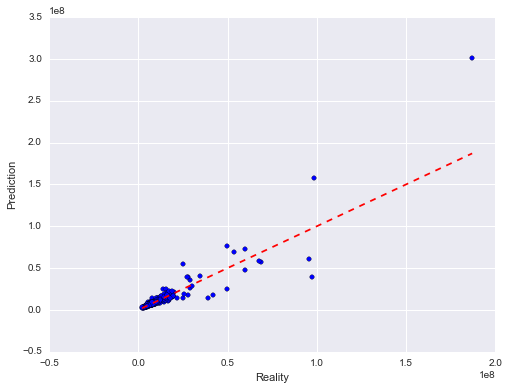

In [268]:
model = RandomForestRegressor(n_estimators=500, max_depth=20)
model.fit(X=train_data, y=train_labels)
accuracy_report(test_labels, model.predict(test_data))

### 4.5

In [269]:
train_data, test_data, train_labels, test_labels = \
cross_validation.train_test_split(df.loc[livesp_dropna_index, ['Totsp', 'Kitsp']],
                                  df.loc[livesp_dropna_index, 'Livesp'],
                                  test_size = 0.1,
                                  random_state=0)

MSE: 9.243
RMSE: 3.040
MAE: 1.836


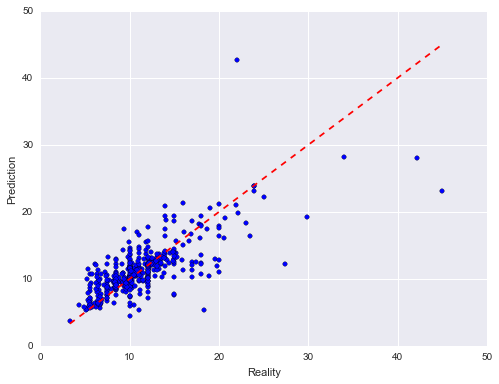

In [281]:
model_fill_lvsp_RF = RandomForestRegressor(n_estimators=400, max_depth=20)
model_fill_lvsp_RF.fit(X=train_data, y=train_labels)
accuracy_report(test_labels, model_fill_lvsp_RF.predict(test_data))

In [282]:
model_fill_lvsp_RF = RandomForestRegressor(n_estimators=400, max_depth=20)
model_fill_lvsp_RF.fit(X=df.loc[livesp_dropna_index, ['Totsp', 'Kitsp']], y=df.loc[livesp_dropna_index, 'Livesp'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=400, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [283]:
pred_lvsp_RF = model_fill_lvsp_RF.predict(df.loc[livesp_na_index, ['Totsp', 'Kitsp']])

In [284]:
df_fill_lvsp_RF = df.copy()

In [285]:
df_fill_lvsp_RF.loc[livesp_na_index, 'Livesp'] = pred_lvsp_RF

In [286]:
data = df_fill_lvsp_RF[['Lat', 'Lon', 'Rooms', 'Totsp', 'Livesp', 'Kitsp', 'Dist', 'Metrdist', 'Walk', 'Tel',\
           'Bal', 'Floor', 'New', 'Price_duplicate']].dropna()

train_data, test_data, train_labels, test_labels = \
cross_validation.train_test_split(data.iloc[:, :-1],
                                  data.iloc[:, -1],
                                  test_size = 0.1,
                                  random_state=0)

MSE: 29154912181345.852
RMSE: 5399528.885
MAE: 1517823.173


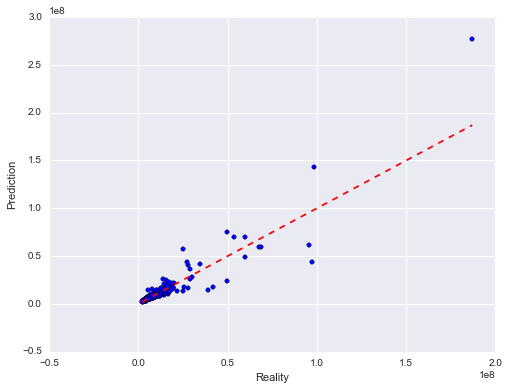

In [291]:
model = RandomForestRegressor(n_estimators=400, max_depth=30)
model.fit(X=train_data, y=train_labels)
accuracy_report(test_labels, model.predict(test_data))